# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Install citypy
# !pip install citipy

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
    
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Base url for open weather api
weather_url = 'http://api.openweathermap.org/data/2.5/weather?'

# Initializing counters
city_count = 0
set_count = 1

# Setting up empty lists to retreive data from the open weather json response
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
city_found = []

print('Beginning Data Retrieval')
print('-----------------------------')

# Making API calls to Open weather API for each city retreived
for ind_city in cities:
    weather_city_url = weather_url + 'q=' + ind_city + '&appid=' + weather_api_key + '&units=Imperial'
    weather_data = requests.get(weather_city_url).json()
    
    try:
        latitude.append(weather_data['coord']['lat'])
        longitude.append(weather_data['coord']['lon'])
        max_temp.append(weather_data['main']['temp_max'])    # Farenheit
        humidity.append(weather_data['main']['humidity'])
        cloudiness.append(weather_data['clouds']['all']) 
        wind_speed.append(weather_data['wind']['speed'])     # miles/hour
        country.append(weather_data['sys']['country'])
        date.append(weather_data['dt'])
        city_found.append(weather_data['name'])
        
        print(f'Processing Record {city_count} of Set {set_count} | {ind_city}')
        
        city_count +=1
        if city_count == 49:
            print(f'Processing Record {city_count} of Set {set_count} | {ind_city}')
            set_count+=1
            city_count = 0
            
    except (KeyError, IndexError):
        print('City not found. Skipping..')  


print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | vaini
Processing Record 1 of Set 1 | nemuro
Processing Record 2 of Set 1 | maumere
Processing Record 3 of Set 1 | vila velha
Processing Record 4 of Set 1 | tomatlan
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | cairns
City not found. Skipping..
City not found. Skipping..
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | carnarvon
Processing Record 12 of Set 1 | springdale
Processing Record 13 of Set 1 | dunedin
Processing Record 14 of Set 1 | jaciara
Processing Record 15 of Set 1 | qaanaaq
City not found. Skipping..
Processing Record 16 of Set 1 | balkhash
Processing Record 17 of Set 1 | mar del plata
Processing Record 18 of Set 1 | humaita
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | airai
City not found. Sk

Processing Record 38 of Set 4 | zyryanka
Processing Record 39 of Set 4 | port-gentil
Processing Record 40 of Set 4 | wanning
City not found. Skipping..
Processing Record 41 of Set 4 | marzuq
Processing Record 42 of Set 4 | srednekolymsk
Processing Record 43 of Set 4 | aquiraz
Processing Record 44 of Set 4 | kirovskiy
Processing Record 45 of Set 4 | sorland
Processing Record 46 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 47 of Set 4 | ponta do sol
Processing Record 48 of Set 4 | riberalta
Processing Record 49 of Set 4 | riberalta
City not found. Skipping..
Processing Record 0 of Set 5 | namibe
Processing Record 1 of Set 5 | hellin
Processing Record 2 of Set 5 | bairnsdale
City not found. Skipping..
City not found. Skipping..
City not found. Skipping..
Processing Record 3 of Set 5 | xuddur
Processing Record 4 of Set 5 | gamba
Processing Record 5 of Set 5 | khuzhir
City not found. Skipping..
Processing Record 6 of Set 5 | sabang
Processing Record 7 of Set 5 | oussouye
Processin

Processing Record 24 of Set 8 | karpathos
Processing Record 25 of Set 8 | tokur
Processing Record 26 of Set 8 | maxixe
Processing Record 27 of Set 8 | nanakuli
Processing Record 28 of Set 8 | preobrazheniye
Processing Record 29 of Set 8 | umm lajj
Processing Record 30 of Set 8 | tecoanapa
Processing Record 31 of Set 8 | whitehorse
City not found. Skipping..
Processing Record 32 of Set 8 | pedernales
Processing Record 33 of Set 8 | solnechnyy
City not found. Skipping..
Processing Record 34 of Set 8 | starkville
Processing Record 35 of Set 8 | mareeba
Processing Record 36 of Set 8 | awbari
Processing Record 37 of Set 8 | hambantota
Processing Record 38 of Set 8 | tommot
Processing Record 39 of Set 8 | maun
Processing Record 40 of Set 8 | point fortin
Processing Record 41 of Set 8 | sechura
Processing Record 42 of Set 8 | kandi
Processing Record 43 of Set 8 | vayalar
Processing Record 44 of Set 8 | dharchula
Processing Record 45 of Set 8 | husavik
Processing Record 46 of Set 8 | phan thie

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Creating the city dataframe with the data retreived from the Open Weather API for each city
city_dataframe = pd.DataFrame({'City': city_found,
                              'Lat': latitude,
                              'Lng': longitude,
                              'Max Temp': max_temp,
                              'Humidity': humidity,
                              'Cloudiness': cloudiness,
                              'Wind Speed': wind_speed,
                              'Country': country,
                              'Date': date})
city_dataframe['Lat'] = round(city_dataframe['Lat'], 2)
city_dataframe['Lng'] = round(city_dataframe['Lng'], 2)
city_dataframe.to_csv(output_data_file, index=False)
city_dataframe.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.20,-175.20,78.96,83,20,5.75,TO,1623967677
1,Nemuro,43.32,145.57,47.98,87,100,6.35,JP,1623967677
2,Maumere,-8.62,122.21,77.99,80,60,4.81,ID,1623967677
3,Vila Velha,-20.33,-40.29,73.35,73,75,8.05,BR,1623967677
4,Tomatlán,19.93,-105.25,89.31,62,93,13.15,MX,1623967678


In [9]:
# Number of cities retreived
len(city_dataframe)

547

In [10]:
# Statistical data of the city dataframe
city_dataframe.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,5.470000e+02
mean,17.735302,22.682651,67.206344,70.500914,53.155393,7.583985,1.623968e+09
std,33.843768,88.853757,15.443661,21.614706,39.628166,5.141086,6.905810e+01
min,-54.800000,-175.200000,30.810000,6.000000,0.000000,0.000000,1.623967e+09
25%,-8.970000,-56.660000,56.010000,61.000000,8.000000,3.880000,1.623968e+09
50%,22.080000,24.670000,68.580000,77.000000,59.000000,6.330000,1.623968e+09
75%,46.245000,102.425000,78.440000,86.000000,95.000000,10.640000,1.623968e+09
max,78.220000,179.320000,111.810000,100.000000,100.000000,29.890000,1.623968e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [279]:
# If the max value for humidity in the dataset is above 100% - remove those records from the dataframe. Step repeated in the step below
# if (city_dataframe['Humidity'].max()) > 100:
#     city_dataframe = city_dataframe.loc[city_dataframe['Humidity'] <= 100, :]

In [11]:
#  Get the indices of cities that have humidity over 100%.
index = city_dataframe.index
humidity_indices = index[city_dataframe['Humidity'] > 100]
humidity_indices_list = humidity_indices.tolist()
humidity_indices_list

[]

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_dataframe
for hum in humidity_indices_list:
    clean_city_data = clean_city_data.drop(hum, inplace = False)

print('Number of records : ' + str(len(clean_city_data)))
clean_city_data.head()

Number of records : 547


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.20,-175.20,78.96,83,20,5.75,TO,1623967677
1,Nemuro,43.32,145.57,47.98,87,100,6.35,JP,1623967677
2,Maumere,-8.62,122.21,77.99,80,60,4.81,ID,1623967677
3,Vila Velha,-20.33,-40.29,73.35,73,75,8.05,BR,1623967677
4,Tomatlán,19.93,-105.25,89.31,62,93,13.15,MX,1623967678


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [13]:
# Getting the current date from time module 
now = time.localtime()
date = time.strftime("%m/%d/%y", now)
print ("Current date : " + date)

Current date : 06/18/21


## Latitude vs. Temperature Plot

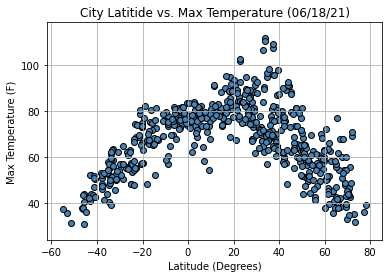

In [14]:
# Creating scatter plot between the latitude and maximum temperature
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], marker = 'o', facecolor='steelblue', edgecolor ='black', alpha=1)
plt.grid()
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitide vs. Max Temperature ({date})')
plt.xlim(clean_city_data['Lat'].min() - 7, clean_city_data['Lat'].max() + 7)
plt.ylim(clean_city_data['Max Temp'].min() - 7, clean_city_data['Max Temp'].max() + 7)
plt.savefig('output_data/scatter_latvstemp.png')
plt.show();

### Explanation and Obervation - Latitude vs. Temperature Plot :
* The above graph is the scatter plot between the Latitude of the cities and the max temperature (F) recorded in the city on the day.
* We can see the maximum temperature increase with latitude for cities with latitude less than 0.
* We can see the maximum temperature decrease with latitude for cities with latitude greater than 0.

## Latitude vs. Humidity Plot

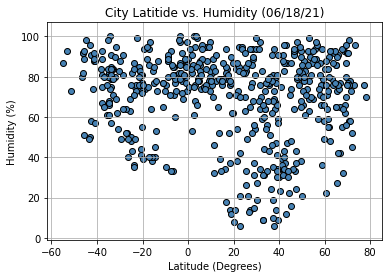

In [15]:
# Creating scatter plot between the latitude and humidity
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], marker = 'o', facecolor='steelblue', edgecolor ='black', alpha=1)
plt.grid()
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitide vs. Humidity ({date})')
plt.xlim(clean_city_data['Lat'].min() - 7, clean_city_data['Lat'].max() + 7)
plt.ylim(clean_city_data['Humidity'].min() - 7, clean_city_data['Humidity'].max() + 7)
plt.savefig('output_data/scatter_latvshum.png')
plt.show();

### Explanation and Obervation - Latitude vs. Humidity Plot :
* The above graph is the scatter plot between the Latitude of the cities and the humidity (%) recorded in the city on the day.
* We cannot really see any relation/trend between the latitudes and the humidity
* We can see that the humidity for most of the cities below 0 degree latitude is higher.

## Latitude vs. Cloudiness Plot

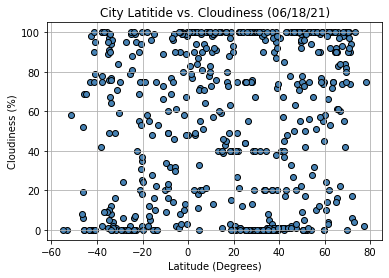

In [16]:
# Creating scatter plot between the latitude and cloudiness
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], marker = 'o', facecolor='steelblue', edgecolor ='black', alpha=1)
plt.grid()
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitide vs. Cloudiness ({date})')
plt.xlim(clean_city_data['Lat'].min() - 7, clean_city_data['Lat'].max() + 7)
plt.ylim(clean_city_data['Cloudiness'].min() - 5, clean_city_data['Cloudiness'].max() + 5)
plt.savefig('output_data/scatter_latvscloud.png')
plt.show();

### Explanation and Obervation - Latitude vs. Cloudiness :
* The above graph is the scatter plot between the Latitude of the cities and the cloudiness(%) recorded in the city on the day.
* We cannot really see any relation/trend between the latitudes and the cloudiness recorded in the cities

## Latitude vs. Wind Speed Plot

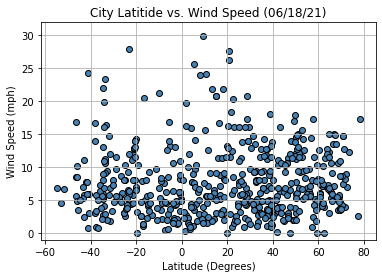

In [17]:
# Creating scatter plot between the latitude and wind speed
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], marker = 'o', facecolor='steelblue', edgecolor ='black', alpha=1)
plt.grid()
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitide vs. Wind Speed ({date})')
plt.xlim(clean_city_data['Lat'].min() - 7, clean_city_data['Lat'].max() + 7)
plt.ylim(clean_city_data['Wind Speed'].min()-1, clean_city_data['Wind Speed'].max()+2)
plt.savefig('output_data/scatter_latvswindspd.png')
plt.show();

### Explanation and Obervation - Latitude vs. Wind Speed :
* The above graph is the scatter plot between the Latitude of the cities and the wind speed (miles per hour) recorded in the     city on the day.
* We cannot really see any relation/trend between the latitudes and the wind speed recorded in the cities

## Linear Regression

In [18]:
# Creating a new dataframe for cities in the northern hemisphere (Latitude degrees >= 0)
city_dataframe_north = clean_city_data.loc[city_dataframe['Lat'] >= 0, :]
print('Number of cities in northern hemisphere : ' + str(len(city_dataframe_north)))
city_dataframe_north.head()

Number of cities in northern hemisphere : 368


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Nemuro,43.32,145.57,47.98,87,100,6.35,JP,1623967677
4,Tomatlán,19.93,-105.25,89.31,62,93,13.15,MX,1623967678
12,Springdale,36.19,-94.13,96.19,51,1,8.01,US,1623967681
15,Qaanaaq,77.48,-69.36,35.87,76,2,2.57,GL,1623967681
16,Balkhash,46.84,74.98,73.47,33,63,11.39,KZ,1623967682


In [19]:
# Creating a new dataframe for cities in the southern hemisphere (Latitude degrees < 0)
city_dataframe_south = clean_city_data.loc[city_dataframe['Lat'] < 0, :]
print('Number of cities in southern hemisphere : ' + str(len(city_dataframe_south)))
city_dataframe_south.head()

Number of cities in southern hemisphere : 179


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.20,-175.20,78.96,83,20,5.75,TO,1623967677
2,Maumere,-8.62,122.21,77.99,80,60,4.81,ID,1623967677
3,Vila Velha,-20.33,-40.29,73.35,73,75,8.05,BR,1623967677
5,Bredasdorp,-34.53,20.04,52.29,82,76,5.14,ZA,1623967678
6,Punta Arenas,-53.15,-70.92,35.62,93,0,4.61,CL,1623967678


In [59]:
# Setting up a function which would create the scatter plot for the various criteria in the northern and southern hemisphere
def linear_regression(xcord, ycord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xcord, ycord)

    regress_values = xcord * slope + intercept

    plt.scatter(xcord, ycord, marker = 'o', facecolor='steelblue', alpha=0.9)
    plt.plot(xcord,regress_values,"r-", label='y={:.2f}x+{:.2f}'.format(slope,intercept))
    plt.legend()
    return(slope, intercept, rvalue)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.6688624395134777


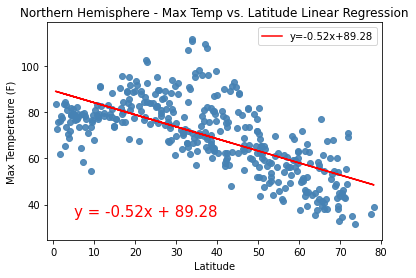

In [64]:
# Passing the values for the latitude and maximum temperature for the northern hemisphere
x_value = city_dataframe_north['Lat']
y_value = city_dataframe_north['Max Temp']

result = linear_regression(x_value, y_value)

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlim(x_value.min() - 2, x_value.max() + 2)
plt.ylim(y_value.min() - 7, y_value.max() + 7)

line_eq = "y = " + str(round(result[0],2)) + "x + " + str(round(result[1],2))
plt.annotate(line_eq,(5,35),fontsize=15,color="red")

print('The r-value is: '+ str(result[2]))
plt.savefig('output_data/linear_north_latvstemp.png')
plt.show();


### Latitude vs. Temperature Linear Regression Plot for Northern Hemisphere :
* The above graph is the linear regression model between the Latitude of the cities in the northern hemisphere and the max temperature (F) recorded in the cities on the day.
* We can see the maximum temperature decreases with latitude for cities in the northern hemisphere. 
* The linear regression line of best fit has a negative slope and we can see the pearson's correlation coefficient (r-value) is close to -1, which shows a negative correlation between the maximum temperature and latitude in the northern hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.8719288825595638


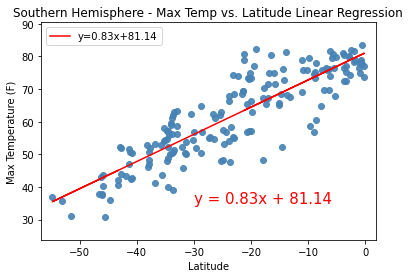

In [66]:
# Passing the values for the latitude and maximum temperature for the southern hemisphere

x_value = city_dataframe_south['Lat']
y_value = city_dataframe_south['Max Temp']

result = linear_regression(x_value, y_value)

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlim(x_value.min() - 2, x_value.max() + 2)
plt.ylim(y_value.min() - 7, y_value.max() + 7)

line_eq = "y = " + str(round(result[0],2)) + "x + " + str(round(result[1],2))
plt.annotate(line_eq,(-30,35),fontsize=15,color="red")

print('The r-value is: '+ str(result[2]))
plt.savefig('output_data/linear_south_latvstemp.png')
plt.show();

### Latitude vs. Temperature Linear Regression Plot for Southern Hemisphere :
* The above graph is the linear regression model between the Latitude of the cities in the southern hemisphere and the max temperature (F) recorded in the cities on the day.
* We can see the maximum temperature increase with latitude for cities in the southern hemisphere. 
* The linear regression line of best fit has a positive slope and we can see the pearson's correlation coefficient is closer to 1, which shows a positive correlation between the maximum temperature and latitude in the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.010647024080187462


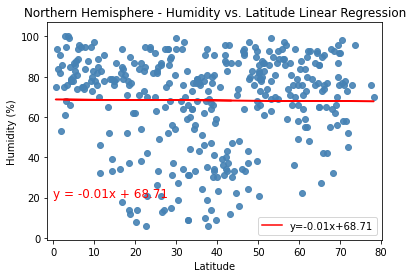

In [75]:
# Passing the values for the latitude and Humidity for the northern hemisphere

x_value = city_dataframe_north['Lat']
y_value = city_dataframe_north['Humidity']

result = linear_regression(x_value, y_value)

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.xlim(x_value.min() - 2, x_value.max() + 2)
plt.ylim(y_value.min() - 7, y_value.max() + 7)

line_eq = "y = " + str(round(result[0],2)) + "x + " + str(round(result[1],2))
plt.annotate(line_eq,(0,20),fontsize=12,color="red")

print('The r-value is: '+ str(result[2]))
plt.savefig('output_data/linear_north_latvshum.png')
plt.show();

### Latitude vs. Humidity Linear Regression Plot for Northern Hemisphere :
* The above graph is the linear regression model between the Latitude of the cities in the northern hemisphere and the Humidity (%) recorded in the cities on the day.
* We can see there is not much of a relation between the humidity and the latitude for cities in the northern hemisphere. 
* The linear regression line of best fit has a slope close to 0 and we can see the pearson's correlation coefficient is closer to 0, which shows no correlation between the humidity and latitude in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.0037346711589170342


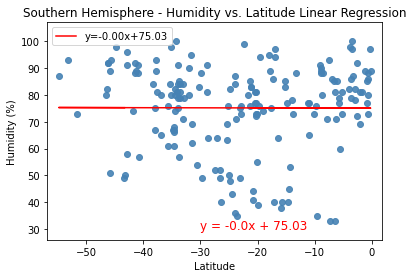

In [81]:
# Passing the values for the latitude and Humidity for the southern hemisphere

x_value = city_dataframe_south['Lat']
y_value = city_dataframe_south['Humidity']

result = linear_regression(x_value, y_value)

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.xlim(x_value.min() - 2, x_value.max() + 2)
plt.ylim(y_value.min() - 7, y_value.max() + 7)

line_eq = "y = " + str(round(result[0],2)) + "x + " + str(round(result[1],2))
plt.annotate(line_eq,(-30,30),fontsize=12,color="red")

print('The r-value is: '+ str(result[2]))
plt.savefig('output_data/linear_south_latvshum.png')
plt.show();

### Latitude vs. Humidity Linear Regression Plot for Southern Hemisphere :
* The above graph is the linear regression model between the Latitude of the cities in the southern hemisphere and the Humidity (%) recorded in the cities on the day.
* We can see there is not much of a relation between the humidity and the latitude for cities in the southern hemisphere. 
* The linear regression line of best fit has a slope close to 0 and we can see the pearson's correlation coefficient is closer to 0, which shows no correlation between the humidity and latitude in the northern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.009736075240633565


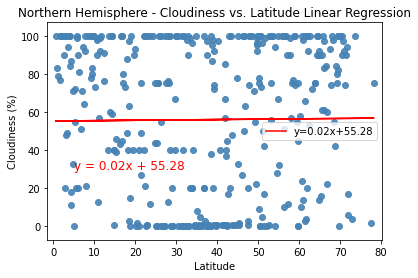

In [84]:
# Passing the values for the latitude and Cloudiness for the northern hemisphere

x_value = city_dataframe_north['Lat']
y_value = city_dataframe_north['Cloudiness']

result = linear_regression(x_value, y_value)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlim(x_value.min() - 2, x_value.max() + 2)
plt.ylim(y_value.min() - 7, y_value.max() + 7)

line_eq = "y = " + str(round(result[0],2)) + "x + " + str(round(result[1],2))
plt.annotate(line_eq,(5,30),fontsize=12,color="red")

print('The r-value is: '+ str(result[2]))
plt.savefig('output_data/linear_north_latvscloud.png')
plt.show();

### Latitude vs. Cloudiness Linear Regression Plot for Northern Hemisphere :
* The above graph is the linear regression model between the Latitude of the cities in the northern hemisphere and the Cloudiness (%) recorded in the cities on the day.
* We can see there is not much of a relation between the cloudiness and the latitude for cities in the northern hemisphere. 
* The linear regression line of best fit has a slope close to 0 and we can see the pearson's correlation coefficient is closer to 0, which shows no correlation between the cloudiness and latitude in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1408289390492046


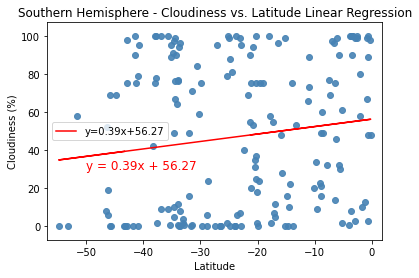

In [86]:
# Passing the values for the latitude and Cloudiness for the southern hemisphere

x_value = city_dataframe_south['Lat']
y_value = city_dataframe_south['Cloudiness']

result = linear_regression(x_value, y_value)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlim(x_value.min() - 2, x_value.max() + 2)
plt.ylim(y_value.min() - 7, y_value.max() + 7)

line_eq = "y = " + str(round(result[0],2)) + "x + " + str(round(result[1],2))
plt.annotate(line_eq,(-50,30),fontsize=12,color="red")

print('The r-value is: '+ str(result[2]))
plt.savefig('output_data/linear_south_latvscloud.png')
plt.show();

### Latitude vs. Cloudiness Linear Regression Plot for Southern Hemisphere :
* The above graph is the linear regression model between the Latitude of the cities in the southern hemisphere and the Cloudiness (%) recorded in the cities on the day.
* We can see there is not much of a relation between the cloudiness and the latitude for cities in the southern hemisphere. 
* The linear regression line of best fit has a slope close to 0 and we can see the pearson's correlation coefficient is closer to 0, which shows no correlation between the cloudiness and latitude in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.007698213876112574


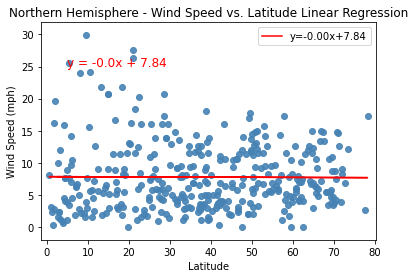

In [88]:
# Passing the values for the latitude and Wind Speed for the northern hemisphere

x_value = city_dataframe_north['Lat']
y_value = city_dataframe_north['Wind Speed']

result = linear_regression(x_value, y_value)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.xlim(x_value.min() - 2, x_value.max() + 2)
plt.ylim(y_value.min() - 2, y_value.max() + 2)

line_eq = "y = " + str(round(result[0],2)) + "x + " + str(round(result[1],2))
plt.annotate(line_eq,(5,25),fontsize=12,color="red")

print('The r-value is: '+ str(result[2]))
plt.savefig('output_data/linear_north_latvswind.png')
plt.show();

### Latitude vs. Wind Speed Linear Regression Plot for Northern Hemisphere :
* The above graph is the linear regression model between the Latitude of the cities in the northern hemisphere and the Wind Speed (mph) recorded in the cities on the day.
* We can see there is not much of a relation between the wind speed and the latitude for cities in the northern hemisphere. 
* The linear regression line of best fit has a slope close to 0 and we can see the pearson's correlation coefficient is closer to 0, which shows no correlation between the wind speed and latitude in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.13835322343806752


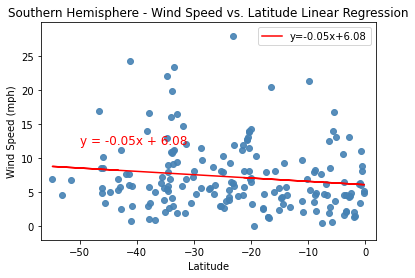

In [90]:
# Passing the values for the latitude and Wind Speed for the southern hemisphere

x_value = city_dataframe_south['Lat']
y_value = city_dataframe_south['Wind Speed']

result = linear_regression(x_value, y_value)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.xlim(x_value.min() - 2, x_value.max() + 2)
plt.ylim(y_value.min() - 2, y_value.max() + 2)

line_eq = "y = " + str(round(result[0],2)) + "x + " + str(round(result[1],2))
plt.annotate(line_eq,(-50,12),fontsize=12,color="red")

print('The r-value is: '+ str(result[2]))
plt.savefig('output_data/linear_south_latvswind.png')
plt.show();

### Latitude vs. Wind Speed Linear Regression Plot for Southern Hemisphere :
* The above graph is the linear regression model between the Latitude of the cities in the southern hemisphere and the Wind Speed (mph) recorded in the cities on the day.
* We can see there is not much of a relation between the wind speed and the latitude for cities in the southern hemisphere. 
* The linear regression line of best fit has a slope close to 0 and we can see the pearson's correlation coefficient is closer to 0, which shows no correlation between the wind speed and latitude in the southern hemisphere.